In [25]:
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('/Users/toddhendricks/Downloads/SeoulBikeData.csv', encoding= 'unicode_escape', dtype= {},infer_datetime_format=True)

In [8]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [10]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True) 

In [20]:
corr = df.corr()

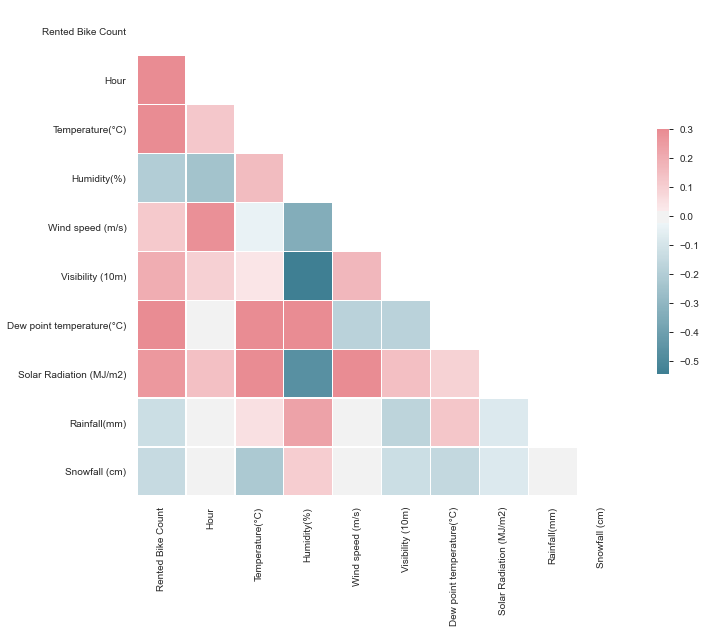

In [26]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


The correlations with rented bike count are what we would expect - namely, that the time of the day and the temperature seem to have the strongest relationship with when bikes get rented. Also, we would expect rain and snow to be negatively correlated. What is interesting, though, is that this the strength of the temperature and time relationships relative to the other features. The absolute measures (~.03) are not that high. 


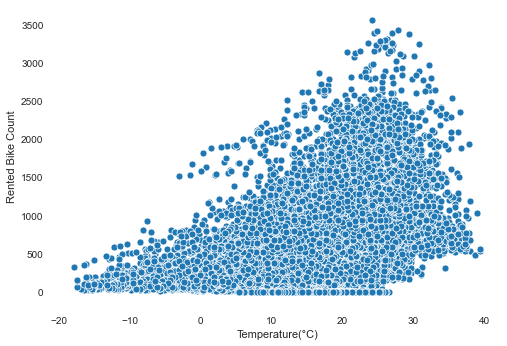

In [27]:
sns.scatterplot(x=df['Temperature(°C)'],y=df['Rented Bike Count'])